In [1]:
import zipfile

In [2]:
import tensorflow as tf

In [3]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
#IMAGE PROCESSING

In [5]:
import keras

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                rotation_range=180,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
x_train = train_datagen.flow_from_directory(r'./Dataset/Dataset/train_set',target_size=(128,128),
                                    batch_size=32,
                                    class_mode='binary')

Found 436 images belonging to 2 classes.


In [9]:
x_test = test_datagen.flow_from_directory(r'./Dataset/Dataset/test_set',target_size=(128,128),
                                    batch_size=32,
                                    class_mode='binary')

Found 121 images belonging to 2 classes.


In [10]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

In [11]:
#MODEL BUILDING

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [13]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

In [15]:
model.fit(x_train, epochs=5, validation_data=x_test, batch_size=32)

Epoch 1/5
14/14 [==============================] - 28s 2s/step - loss: 1.5288 - accuracy: 0.6491 - val_loss: 0.2605 - val_accuracy: 0.9256
Epoch 2/5
14/14 [==============================] - 21s 2s/step - loss: 0.3201 - accuracy: 0.8670 - val_loss: 0.1152 - val_accuracy: 0.9669
Epoch 3/5
14/14 [==============================] - 19s 1s/step - loss: 0.1894 - accuracy: 0.9289 - val_loss: 0.1204 - val_accuracy: 0.9504
Epoch 4/5
14/14 [==============================] - 19s 1s/step - loss: 0.1803 - accuracy: 0.9266 - val_loss: 0.0632 - val_accuracy: 0.9835
Epoch 5/5
14/14 [==============================] - 19s 1s/step - loss: 0.1691 - accuracy: 0.9243 - val_loss: 0.0610 - val_accuracy: 0.9835


In [16]:
model.save("forest1.h5")

In [17]:
import numpy as np

In [18]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [19]:
predictions

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [20]:
print(len(predictions))

121


In [21]:
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [22]:
model = load_model(r'forest1.h5')

In [23]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [24]:
predictImage(r'C:\Users\Rakshana\OneDrive\Desktop\IBM\Datasets\Dataset\Dataset\test_set\with fire\louisiana_forest_fire.jpg')

1/1 [==============================] - 0s 105ms/step
[[4.3025763e-21]]


In [28]:
#OPENCV FOR VIDEO PROCESSING

In [29]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

In [30]:
model = load_model(r'forest1.h5')
video = cv2.VideoCapture('VideoCapture.mp4')
name = ['forest','with forest']

In [31]:
#Creating An Account in Twilio Service

In [32]:
pip install twilio

In [33]:
pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [38]:
account_sid='AC6be2d13a80de59f51a5fe3ba2bf9d6f1'
auth_token='00ac87e22f4bbc807a00a5ca30eedd1e'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
      body='Forest Fire is Detected, Stay Alert!!',
      from_='+14793912961',
      to='+917358579433'
)
print(message.sid)

SM6634ba4bf81fc7e11100562a70c495b5


In [39]:
#Sending Alert Message

In [40]:
from keras.preprocessing import image

1/1 [==============================] - 0s 32ms/step


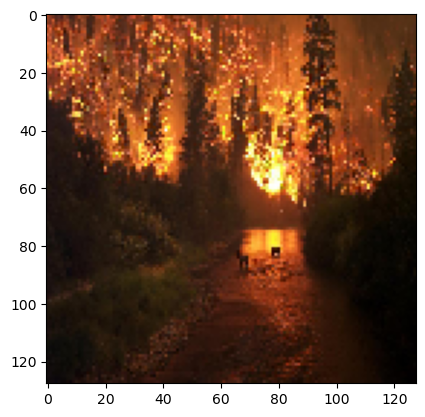

Forest fire


In [41]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img(r'C:\Users\Rakshana\OneDrive\Desktop\MAIN_PROJECT\Dataset\Dataset\test_set\with fire\deerfire_high_res_edit.jpg',target_size=(128,128))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
if val==1:
  print('Forest fire')

In [43]:
if val==1:
  print('Forest fire')
  from twilio.rest import Client
  account_sid='AC6be2d13a80de59f51a5fe3ba2bf9d6f1'
  auth_token='00ac87e22f4bbc807a00a5ca30eedd1e'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='Forest Fire is Detected, Stay Alert!!',from_='+14793912961',
      to='+917358579433')
  print(message.sid)
  print("Fire Detected")
  print("SMS Sent!")
elif val==0:
  print('No Fire')

Forest fire
SM2010c05d1164f3c7f74f4e3a946bd846
Fire Detected
SMS Sent!
